In [1]:
import torch

We need a dataset loader class to efficiently manage and load data in batches during training. This is especially important for large datasets that don't fit into memory. It also handles tasks like shuffling and transformations.

In [2]:
from sklearn.datasets import make_classification

In [3]:
# step 1 : Create a synthetic classification dataset using sklearn
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

In [4]:
X

array([[ -4.90644173,   3.44278902,   0.55896373, ...,   3.01285895,
         -4.4970026 ,  -2.52006572],
       [  2.16261046,  -5.2866508 ,   2.60984566, ...,  -4.56217784,
          3.69866457,  -1.92328575],
       [ -4.78484428,  -3.74482699,   4.65759163, ...,  -7.8446457 ,
          2.80379841,  -2.96318945],
       ...,
       [-10.4123717 ,  -5.32462138,  -1.03805762, ...,   8.97804725,
          3.57786925,   4.28159633],
       [  0.28820005,   2.83863363,   2.79969055, ...,  -6.31392968,
         -1.85129503,  -4.92026386],
       [  2.83104091,   4.03525551,   0.25816518, ..., -12.18842291,
          2.16378616,   4.64310326]])

In [5]:
y

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [6]:
 # Converting into tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

Dataset and dataloader are two core abstraction in pytorch that decouple how you define your data from how you efficiently iterate over it in training loops.


In [7]:
X

tensor([[ -4.9064,   3.4428,   0.5590,  ...,   3.0129,  -4.4970,  -2.5201],
        [  2.1626,  -5.2867,   2.6098,  ...,  -4.5622,   3.6987,  -1.9233],
        [ -4.7848,  -3.7448,   4.6576,  ...,  -7.8446,   2.8038,  -2.9632],
        ...,
        [-10.4124,  -5.3246,  -1.0381,  ...,   8.9780,   3.5779,   4.2816],
        [  0.2882,   2.8386,   2.7997,  ...,  -6.3139,  -1.8513,  -4.9203],
        [  2.8310,   4.0353,   0.2582,  ..., -12.1884,   2.1638,   4.6431]])

In [8]:
from torch.utils.data import Dataset, DataLoader

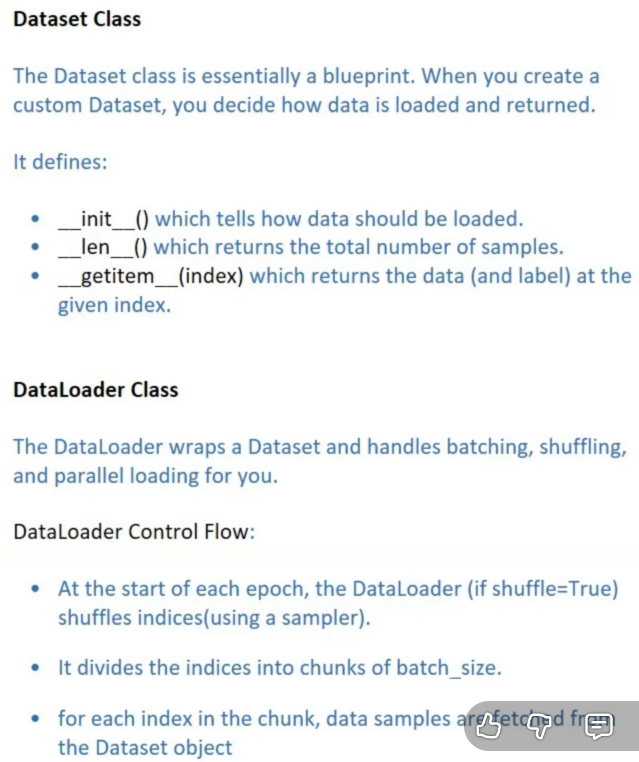

In [13]:
# Create a Custom dataset class
class CustomDataset(Dataset):
  def __init__(self,features,labels):
    self.features = features
    self.labels = labels

  def __len__(self):
    return self.features.shape[0]

  def __getitem__(self,index):
    return self.features[index],self.labels[index]

In [10]:
dataset = CustomDataset(X,y)

In [11]:
len(dataset)

1000

In [12]:
dataset[2]

(tensor([-4.7848, -3.7448,  4.6576, -1.4088, -5.4448, -2.4160,  3.5565, -1.5721,
         -0.7305,  3.4477, -2.6091,  7.9611, -5.1511,  0.4731, -4.0707, -0.9323,
         -3.2308, -7.8446,  2.8038, -2.9632]),
 tensor(1.))

In [14]:
dataloader = DataLoader(dataset, batch_size = 2, shuffle = True)

In [15]:
for batch_features, batch_labels in dataloader:
  print(batch_features)
  print(batch_labels)
  print("-"*50)

tensor([[ -0.1101,  -1.5310,   0.9595,   0.1549,  -1.9706,   1.6885,   0.4214,
          -2.8560,  -2.1333,   3.5434,   3.0437, -10.5686,   1.3976,  -4.1845,
           1.2486,  -2.4628,  -0.7761,   1.9299,  -1.0541,  -1.3109],
        [ -0.1508,   5.3301,  -0.2197,   0.3578,   1.4902,  -0.7454,  -0.3191,
          -0.2524,  -0.4575,  -0.4637,  -1.3269,   2.4450,   0.4426,  -2.7294,
           2.0506,   4.9933,  -2.0902,   4.1484,  -2.2419,   6.7825]])
tensor([1., 0.])
--------------------------------------------------
tensor([[ 4.0011,  5.1340,  2.9051,  0.9896,  1.3745, -1.9186, -0.8700, -2.7755,
          1.4010, -5.6736, -1.0823,  3.2664, -1.8325, -0.4815,  1.9488, -0.9974,
         -3.1197, -0.5900,  2.6001,  3.9976],
        [-9.4473,  7.3227,  4.1835, -3.5245, -0.2233, -3.3744, -4.5225, -0.4721,
          2.0182,  0.7629, -4.1193,  8.7104,  1.8381,  0.5397, -1.6224, -5.0568,
          4.8085, -2.3430, -2.1151, -0.4547]])
tensor([0., 0.])
-----------------------------------------

 In PyTorch's DataLoader, the num_workers parameter controls how many subprocesses are used for data loading.

When num_workers is 0 (the default), the data loading is done in the main process. This is simple but can be a bottleneck, especially when training on a GPU, as the main process has to wait for data to be loaded before it can continue.

When num_workers is set to a positive integer, PyTorch uses that many subprocesses (workers) to load data in parallel. These workers prefetch batches of data in the background while the main process is busy with training. This can significantly speed up training by reducing the idle time of the main process.

Essentially, workers are like helpers that fetch data ahead of time, so the main training process doesn't have to wait. This is particularly beneficial when your data loading or preprocessing is computationally intensive.

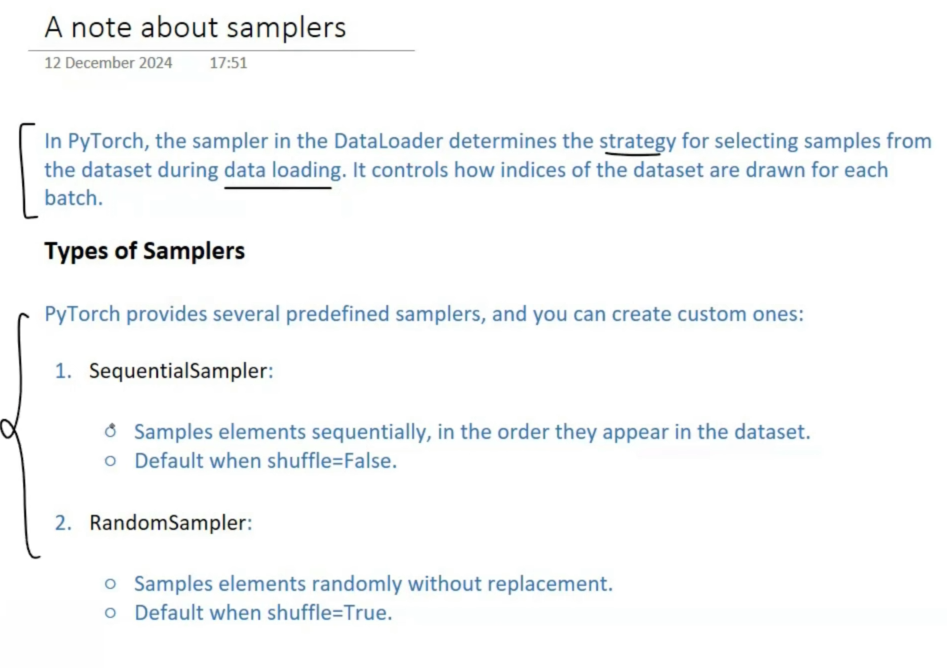